In [81]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt

In [4]:
num_classes

In [5]:
modelo_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [7]:
for layer in modelo_base.layers:
   layer.trainable = False

In [8]:
modelo = tf.keras.Sequential(
     [modelo_base,
     GlobalAveragePooling2D(),
     Dense(1024, activation = 'relu'),
     Dense(num_classes, activation ='softmax')
    ])

In [9]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [10]:
path = 'E:/visao_am/arquivos/dc_small/'

In [21]:
def cria_dataframe(caminho):
    arquivos =[]
    rotulos = []
    for arquivo in os.listdir(caminho):
        if arquivo.startswith('cat'):
            rotulos.append('cat')
        elif arquivo.startswith('dog'):
            rotulos.append('dog')
        arquivos.append(arquivo)
    return pd.DataFrame({'arquivo': arquivos, 'rotulo': rotulos})

In [22]:
df_dados = cria_dataframe(os.path.join(path, 'train'))

In [23]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   arquivo  2000 non-null   object
 1   rotulo   2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [25]:
df_dados.tail(10)

,arquivo,rotulo
1990,dog.990.jpg,dog
1991,dog.991.jpg,dog
1992,dog.992.jpg,dog
1993,dog.993.jpg,dog
1994,dog.994.jpg,dog
1995,dog.995.jpg,dog
1996,dog.996.jpg,dog
1997,dog.997.jpg,dog
1998,dog.998.jpg,dog
1999,dog.999.jpg,dog


In [28]:
train_df, validation_df = train_test_split(df_dados, test_size=0.2, stratify=df_dados['rotulo'])


In [31]:
test_df = cria_dataframe(os.path.join(path, 'test1'))

In [32]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
validation_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [36]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=os.path.join(path, 'train'),
    x_col='arquivo',
    y_col='rotulo',
    target_size=(224,224),
    batch_size= 32,
    class_mode='categorical'
)

Found 1600 validated image filenames belonging to 2 classes.


In [37]:
validation_generator = validation_datagen.flow_from_dataframe(
    validation_df,
    directory=os.path.join(path, 'train'),
    x_col='arquivo',
    y_col='rotulo',
    target_size=(224,224),
    batch_size= 32,
    class_mode='categorical'
)

Found 400 validated image filenames belonging to 2 classes.


In [41]:
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=os.path.join(path, 'test1'),
    x_col='arquivo',
    y_col='rotulo',
    target_size=(224,224),
    batch_size= 32,
    class_mode='categorical'
)

Found 1000 validated image filenames belonging to 2 classes.


In [42]:
modelo.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=2
)

Epoch 1/2


50/50 [==============================] - 63s 1s/step - loss: 0.1784 - accuracy: 0.9581 - val_loss: 0.0681 - val_accuracy: 0.9844
Epoch 2/2
50/50 [==============================] - 59s 1s/step - loss: 0.0448 - accuracy: 0.9869 - val_loss: 0.2000 - val_accuracy: 0.9688


In [44]:
test_loss, test_accuracy = modelo.evaluate(test_generator, steps = test_generator.samples // test_generator.batch_size)
print(f'Acurácia no teste: {test_accuracy}')

31/31 [==============================] - 29s 924ms/step - loss: 0.2784 - accuracy: 0.9526
Acurácia no teste: 0.9526209831237793


In [50]:
path2 = 'E:/visao_am/arquivos/teste/'

In [54]:
img_p = path2 + 'cao.webp'
img = image.load_img(img_p, target_size=(224, 224))

img_p2 = path2 + 'gato_Wilfred_04.jpg'
img2 = image.load_img(img_p2, target_size=(224, 224))

img_p3 = path2 + 'srcat.webp'
img3 = image.load_img(img_p3, target_size=(224, 224))

img_p4 = path2 + 'vo_do_sid.webp'
img4 = image.load_img(img_p4, target_size=(224, 224))


In [72]:
img_p = image.img_to_array(img)
img_p = np.expand_dims(img_p, axis=0)
img_p = preprocess_input(img_p)


In [73]:
pred = modelo.predict(img_p)


1/1 [==============================] - 0s 83ms/step


In [74]:
img_p2 = image.img_to_array(img2)
img_p2 = np.expand_dims(img_p2, axis=0)
img_p2 = preprocess_input(img_p2)
pred2 = modelo.predict(img_p)

1/1 [==============================] - 0s 105ms/step


In [75]:
img_p3 = image.img_to_array(img3)
img_p3 = np.expand_dims(img_p3, axis=0)
img_p3 = preprocess_input(img_p3)
pred3 = modelo.predict(img_p3)

1/1 [==============================] - 0s 86ms/step


In [76]:
img_p4 = image.img_to_array(img4)
img_p4 = np.expand_dims(img_p4, axis=0)
img_p4 = preprocess_input(img_p4)
pred4 = modelo.predict(img_p4)

1/1 [==============================] - 0s 80ms/step


In [77]:
resultado_classe = np.argmax(pred[0])

In [78]:
classes = ['cat', 'dog']

In [79]:
print('Predição: ', classes[resultado_classe])

Predição:  cat


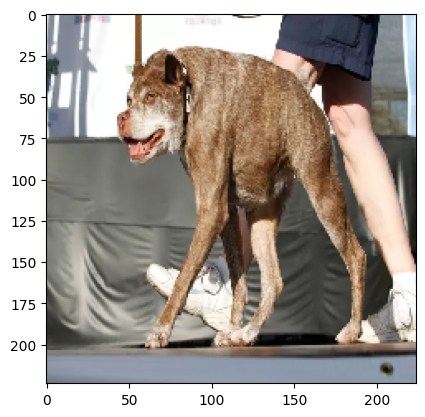

In [82]:
plt.imshow(img)